# Ejercicio 4
Contenido del dataset: Conjunto de datos de vino rojo para determinar su calidad. Hay 12 atributos y el último atributo es la calidad, que se tomará como etiqueta. La calidad varía de 0 a 10, pero se va a convertir a un problema con dos clases, calidad pobre, de 0 a 5, y buena, de 6 a 10. 
El ejercicio consiste obtener un modelo de clasificación para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Los atributos son: 1 fixed acidity, 2 volatile acidity, 3 citric acid, 4 residual sugar, 5 chlorides, 6 free sulfur dioxide, 7 total sulfur dioxide, 8 density, 9 pH, 10 sulphates, 11 alcohol, 12 quality (score between 0 and 10)
*   URL: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

**Tomando como base el ejemplo 9 de los suministrados en clase**, implementar un clasificador basado en voting, que use los siguientes clasificadores: Random Forest, Regresión Logística y SVC. Ha de contener los siguientes apartados.
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases estuviesen desbalanceadas.
*   Aplicar la técnica de voting.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Aplicar posteriormente los clasificadores cada uno por separado y obtener las mismas medidas para comparar con el clasificador basado en voting.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

In [18]:
import pandas as pd

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, auc

In [2]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2023-12-26 14:09:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

     0K .......... .......... .......... .......... ..........  152K
    50K .......... .......... .......... ..                     622K=0.4s

2023-12-26 14:09:08 (216 KB/s) - ‘winequality-red.csv’ saved [84199]



In [3]:
wine = pd.read_csv("winequality-red.csv", sep=';')
#El segundo parámetro es para indicar que los separadotes son puntos y comas, ya que por defecto son comas.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Guardamos las etiquetas en y
y = wine["quality"]
#Definimos dos etiquetas, calidad > 5 (clase positiva), calidad <= 5 (clase negativa)
y = (y >5) 
#Eliminamos las etiquetas del data set
X = wine.drop("quality", axis = 1)

### Uso de StandardScaler en el preprocesamiento.

In [6]:
#Ahora se escalan los datos
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [7]:
#Vamos a ver las 3 primeras instancias del dataset
X[:3]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711]])

In [8]:
y[:3]

0    False
1    False
2    False
Name: quality, dtype: bool

# Implementar un clasificador basado en voting, que use los siguientes clasificadores: Random Forest, Regresión Logística y SVC. Ha de contener los siguientes apartados.

### Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases estuviesen desbalanceadas.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.2, random_state = 42)

print("Tamaño de los conjuntos:")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


print("\n\nProporción de etiquetas:")
print(y_train.value_counts())
print(y_test.value_counts())

Tamaño de los conjuntos:
(1279, 11)
(320, 11)
(1279,)
(320,)


Proporción de etiquetas:
quality
True     684
False    595
Name: count, dtype: int64
quality
True     171
False    149
Name: count, dtype: int64


### Aplicar la técnica de voting.

In [17]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

### Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.

Matriz de Confusión:
[[117  32]
 [ 44 127]]

Métricas de Rendimiento:
Accuracy:  0.7625
Precision:  0.7987421383647799
Recall:  0.7426900584795322
F1:  0.7696969696969698


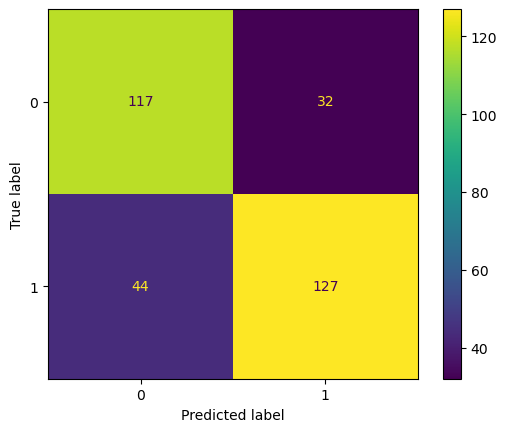

In [24]:
# Predecir las clases de los datos de test
y_pred = voting_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas de Rendimiento:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

### Aplicar posteriormente los clasificadores cada uno por separado y obtener las mismas medidas para comparar con el clasificador basado en voting.

#### Regresión logística

Matriz de Confusión:
[[111  38]
 [ 45 126]]

Métricas de Rendimiento:
Accuracy:  0.740625
Precision:  0.7682926829268293
Recall:  0.7368421052631579
F1:  0.7522388059701494


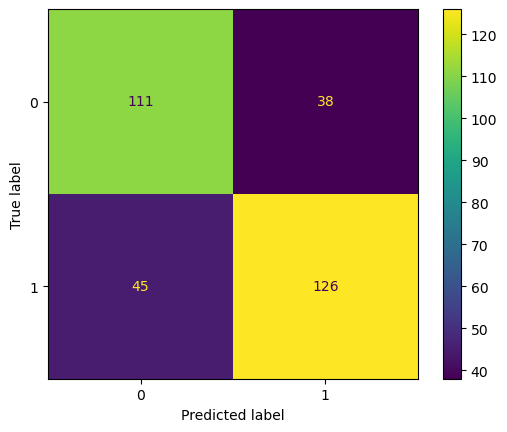

In [25]:
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas de Rendimiento:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

#### Random Forest

Matriz de Confusión:
[[121  28]
 [ 34 137]]

Métricas de Rendimiento:
Accuracy:  0.80625
Precision:  0.8303030303030303
Recall:  0.8011695906432749
F1:  0.8154761904761906


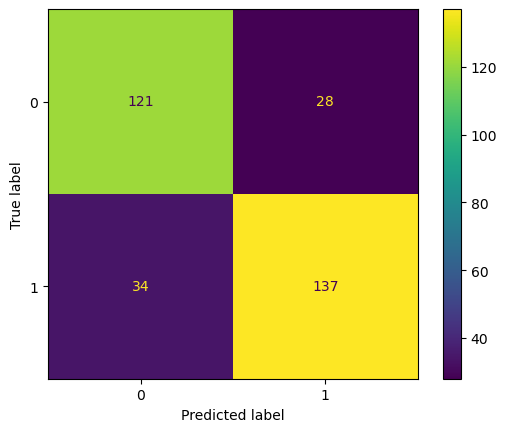

In [26]:
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas de Rendimiento:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

#### SCV

Matriz de Confusión:
[[118  31]
 [ 48 123]]

Métricas de Rendimiento:
Accuracy:  0.753125
Precision:  0.7987012987012987
Recall:  0.7192982456140351
F1:  0.7569230769230769


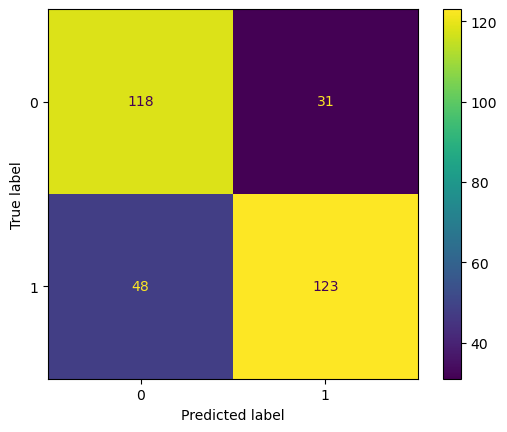

In [27]:
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas de Rendimiento:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

# Resumen del Notebook:

## Descargar y Cargar Conjunto de Datos
Se descarga y carga el conjunto de datos Wine Quality desde el repositorio UCI Machine Learning.

## Preprocesamiento y División de Datos
Se extraen las etiquetas del cojunto de datos completo, y de deja 'quality' para las labels. Luego paraa convertirlo en un problema binario se establece un umbral de y>5. Y se utiliza split_train_test estratificado para realizar la separación del conjunto de datos.

## Construir y Entrenar el Clasificador
Se utiliza un clasificador voting que combina los clasificadores Random Forest, Regresión Logística y SVC.

## Evaluar el Rendimiento del Clasificador
Se predicen las clases de los datos de prueba y se evalúa el rendimiento con la matriz de confusión, accuracy, precisión, recall, y F1-score.

## Clasificadores Individuales
Se aplican y evalúan los clasificadores cada uno por separado para comparar con el clasificador de voting.


# Interpretación de Resultados:

## Clasificador de Voting:

La matriz de confusión muestra un rendimiento bueno del clasificador de votación. Se clasificaron correctamente 244 instancias negativas y 171 instancias positivas. Se observa que hubo 32 falsos positivos y 44 falsos negativos. La normalización de la matriz respecto a las filas, es la siguiente:

[[0.78481013 0.21518987]
 [0.20512821 0.79487179]]

- **Accuracy:** El modelo predice correctamente el 76.25% de las instancias, mostrando un rendimiento aceptable.
- **Precisión:** Del total de instancias clasificadas como positivas, el 79.87% son realmente positivas, indicando una capacidad razonable de evitar falsos positivos.
- **Recall:** El modelo identifica correctamente el 74.27% de todas las instancias positivas, mostrando una sensibilidad moderada.
- **F1-score:** La métrica F1, que combina precisión y recall, es de 76.97, indicando un equilibrio adecuado entre ambas métricas.

## Clasificadores Individuales:

### Regresión Logística:

La matriz de confusión revela un rendimiento aceptable del clasificador de regresión logística. Se clasificaron correctamente 237 instancias negativas y 171 instancias positivas. Se observa que hubo 38 falsos positivos y 45 falsos negativos. La normalización de la matriz, considerando las filas, es la siguiente:

[[0.74528302 0.25471698]
 [0.20833333 0.79166667]]

- **Accuracy:** El modelo predice correctamente el 74.06% de las instancias, mostrando un rendimiento aceptable.
- **Precisión:** Del total de instancias clasificadas como positivas, el 76.83% son realmente positivas, indicando tener capacidad para evitar falsos positivos.
- **Recall:** El modelo identifica correctamente el 73.68% de todas las instancias positivas, mostrando una sensibilidad moderada.
- **F1-score:** La métrica F1, que combina precisión y recall, es de 75.22%, indicando un equilibrio adecuado entre ambas métricas.

### Random Forest:

La matriz de confusión revela un rendimiento positivo del clasificador Random Forest. Se clasificaron correctamente 258 instancias negativas y 171 instancias positivas. Se observa que hubo 28 falsos positivos y 34 falsos negativos. La normalización de la matriz respecto a las filas, es la siguiente:

[[0.8125     0.1875    ]
 [0.16548463 0.83451537]]

- **Accuracy:** El modelo predice correctamente el 80.63% de las instancias, mostrando un rendimiento positivo.
- **Precisión:** Del total de instancias clasificadas como positivas, el 83.03% son realmente positivas, indicando una capacidad razonable de evitar falsos positivos.
- **Recall:** El modelo identifica correctamente el 80.12% de todas las instancias positivas, mostrando una sensibilidad moderada.
- **F1-score:** La métrica F1, que combina precisión y recall, es de 81.55%, indicando un buen equilibrio entre ambas métricas.

### SVC:

La matriz de confusión revela un rendimiento aceptable del clasificador SVC. Se clasificaron correctamente 241 instancias negativas y 171 instancias positivas. Se observa que hubo 31 falsos positivos y 48 falsos negativos. La normalización de la matriz, considerando las filas, es la siguiente:

[[0.75520833 0.24479167]
 [0.21818182 0.78181818]]

- **Accuracy:** El modelo predice correctamente el 75.31% de las instancias, mostrando un rendimiento aceptable.
- **Precisión:** Del total de instancias clasificadas como positivas, el 79.87% son realmente positivas, indicando una buena capacidad para evitar falsos positivos.
- **Recall:** El modelo identifica correctamente el 71.93% de todas las instancias positivas, mostrando una sensibilidad moderada.
- **F1-score:** La métrica F1, que combina precisión y recall, es de 75.69, indicando un equilibrio adecuado entre ambas métricas.

## Resumen

El clasificador Random Forest muestra el mejor rendimiento entre los cuatro algoritmos evaluados, con un accuracy del 80.63%, una precisión del 83.03%, recall del 80.12%, y F1-score del 81.55%. Estas métricas indican un equilibrio sólido entre la capacidad de predecir correctamente instancias positivas y negativas. La diferencia significativa en el F1-score sugiere que Random Forest supera a los otros clasificadores en general, destacando su eficacia en este conjunto de datos específico.